## Importing essential libraries for data analysis and graph processing

In [1]:
import pandas as pd  # Library for data manipulation in DataFrame format
import numpy as np  # Library for numerical operations and array manipulation
import networkx as nx  # Library for the creation and manipulation of graphs
import matplotlib.pyplot as plt  # Library for the creation of charts and visualisations

from langdetect import detect  # Library for language detection
from utils import extractAffiliations, createGraph, plotGraph  # Utility functions for extracting affiliations, creating graphs, and plotting graphs

## Initialisation and construction of graphs from DataFrames, and calculation of average degree connectivity

In [2]:
# Initializes empty graphs using the NetworkX library
graph7 = nx.Graph()
graph9 = nx.Graph()
graph12 = nx.Graph()
graph16 = nx.Graph()

# Calls the 'createGraph' function to construct the graphs from the DataFrames
createGraph(pd.read_csv(r'scopus/scopus_7.csv'), graph7)
createGraph(pd.read_csv(r'scopus/scopus_9.csv'), graph9)
createGraph(pd.read_csv(r'scopus/scopus_12.csv'), graph12)
createGraph(pd.read_csv(r'scopus/scopus_16.csv'), graph16)

# Calculates the average degree connectivity for each graph and separates into degree tuples and average degrees
degree7, averageNeighborDegree7 = zip(*nx.average_degree_connectivity(graph7).items())
degree9, averageNeighborDegree9 = zip(*nx.average_degree_connectivity(graph9).items())
degree12, averageNeighborDegree12 = zip(*nx.average_degree_connectivity(graph12).items())
degree16, averageNeighborDegree16 = zip(*nx.average_degree_connectivity(graph16).items())

## Creation and visualisation of graphs

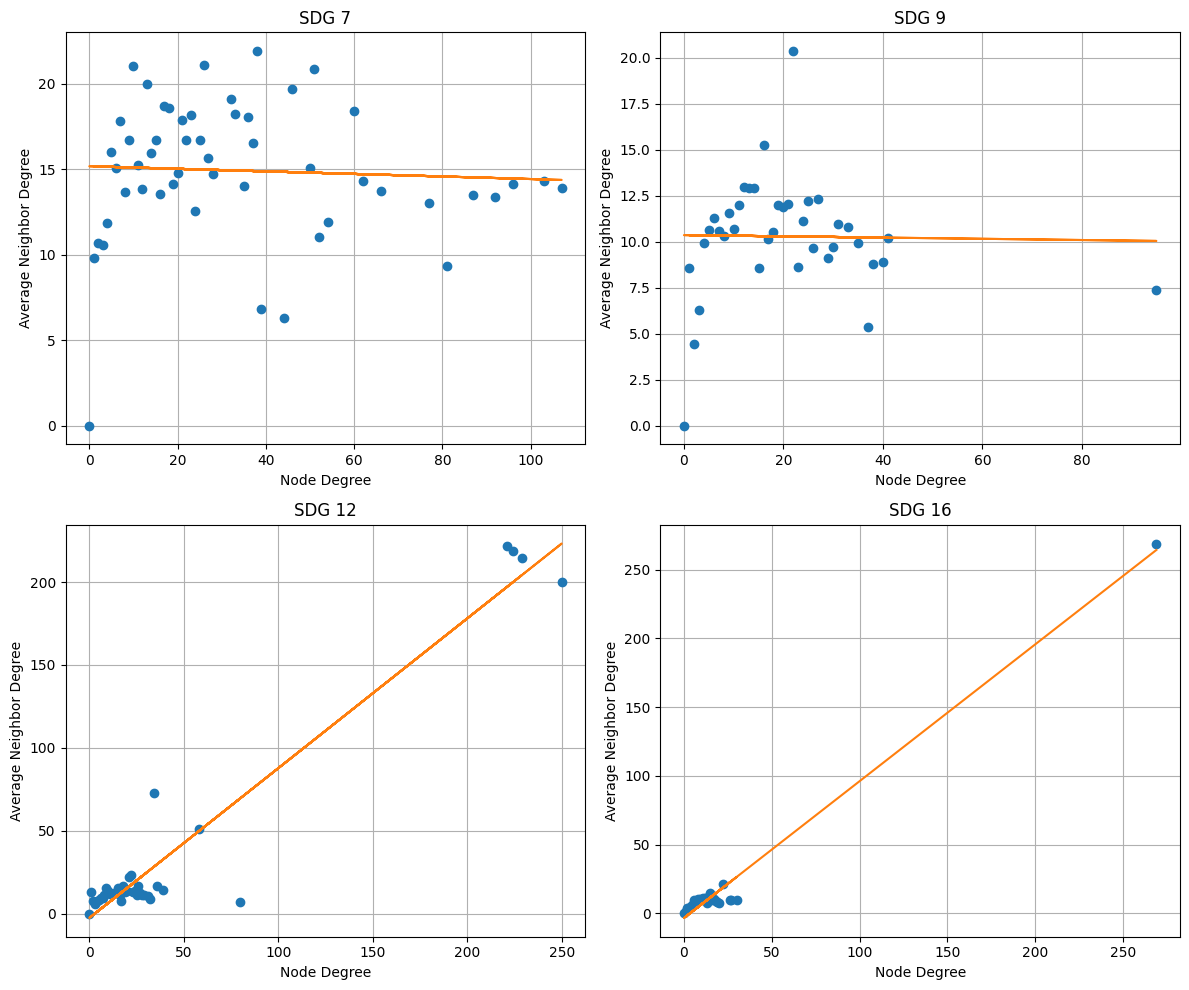

In [3]:
# Creates a figure with a 2x2 grid for visualising the graphs, with a size of 12x10 inches
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plots the graphs on each axis of the grid
plotGraph(axs[0, 0], degree7, averageNeighborDegree7, 'SDG 7')  # SDG 7 on axis (0,0)
plotGraph(axs[0, 1], degree9, averageNeighborDegree9, 'SDG 9')  # SDG 9 on axis (0,1)
plotGraph(axs[1, 0], degree12, averageNeighborDegree12, 'SDG 12')  # SDG 12 on axis (1,0)
plotGraph(axs[1, 1], degree16, averageNeighborDegree16, 'SDG 16')  # SDG 16 on axis (1,1)

# Adjusts the layout to avoid overlapping graphs and ensure everything is visible
plt.tight_layout()
plt.show()

## Compilation of graph metrics into a DataFrame for various SDGs

In [4]:
# Creates a dictionary that groups various metrics of the graphs for the four SDGs
table = {
    'Network': ['SDG 7', 'SDG 9', 'SDG 12', 'SDG 16'],  # Names of the SDGs associated with the graphs
    'Number of Nodes': [graph7.number_of_nodes(), graph9.number_of_nodes(), graph12.number_of_nodes(), graph16.number_of_nodes()],  # Number of nodes
    'Number of Edges': [graph7.number_of_edges(), graph9.number_of_edges(), graph12.number_of_edges(), graph16.number_of_edges()],  # Number of edges
    'Degree Assortativity Coefficient': [nx.degree_assortativity_coefficient(graph7), nx.degree_assortativity_coefficient(graph9), nx.degree_assortativity_coefficient(graph12), nx.degree_assortativity_coefficient(graph16)],  # Degree assortativity coefficient
    'Number of Connected Components': [nx.number_connected_components(graph7), nx.number_connected_components(graph9), nx.number_connected_components(graph12), nx.number_connected_components(graph16)],  # Number of connected components
    'Size of the Giant Component': [len(max(nx.connected_components(graph7), key=len)), len(max(nx.connected_components(graph9), key=len)), len(max(nx.connected_components(graph12), key=len)), len(max(nx.connected_components(graph16), key=len))],  # Size of the largest connected component
    'Clustering Coefficient': [nx.average_clustering(graph7), nx.average_clustering(graph9), nx.average_clustering(graph12), nx.average_clustering(graph16)]  # Average clustering coefficient
}

# Creates a DataFrame from the dictionary for easier data analysis
pd.DataFrame(table)

,Network,Number of Nodes,Number of Edges,Degree Assortativity Coefficient,Number of Connected Components,Size of the Giant Component,Clustering Coefficient
0,SDG 7,1925,7479,-0.012097,107,903,0.884052
1,SDG 9,1640,5845,0.056051,134,483,0.899194
2,SDG 12,1587,29938,0.971542,139,301,0.918693
3,SDG 16,1020,38741,0.999769,122,270,0.883028
